<a href="https://colab.research.google.com/github/caschern/2021-fall-data-science/blob/main/Week9_Neural_Networks_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Layers for our neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# A pretrained model for transfer learning
from keras.models import Model
from keras.applications import vgg19

# Our normal python data science stack you've come to know and love
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

print(tf.__version__)

2.7.0


You're going to use a neural network to make predictions on the MNIST Fashion data set.  Check out the documentation here, make sure you check the size of the images and how many classes are in the data set https://keras.io/api/datasets/fashion_mnist/

In [ ]:
# switch runtime to GPU

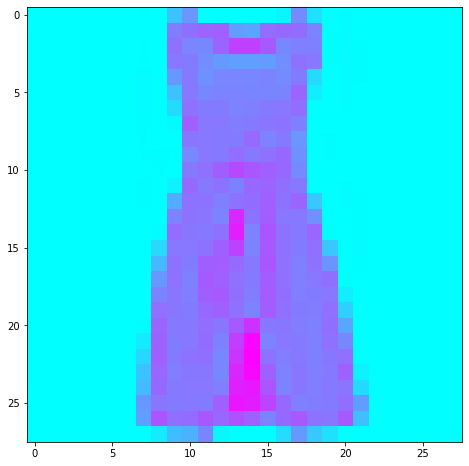

In [8]:
# load the fashion mnist data set using tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


plt.figure(figsize=(8,8))


img = x_train[114]


img = img.reshape(28,28)


plt.imshow(img, cmap='cool')

In [9]:
# divide the values by 255 and reshape 
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1, 28, 28, 1)
y_train = y_train.reshape(-1)

x_test = x_test.reshape(-1, 28, 28, 1)
y_test = y_test.reshape(-1)

In [18]:
# build the architecture of your model using Sequential()
# you can use the same architecture we used in class, try to put your own spin on it, or copy another existing architecture
# make sure you set the correct input shape and the correct parameters for the last dense layer
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(input_shape=(28,28, 1),filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))

model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
# compile your model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [20]:
# fit your model
epochs = 11
model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/11
1688/1688 [==============================] - 17s 9ms/step - loss: 0.5038 - acc: 0.8098 - val_loss: 0.3537 - val_acc: 0.8672
Epoch 2/11
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3140 - acc: 0.8835 - val_loss: 0.2756 - val_acc: 0.8970
Epoch 3/11
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2676 - acc: 0.9027 - val_loss: 0.2806 - val_acc: 0.8972
Epoch 4/11
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2371 - acc: 0.9132 - val_loss: 0.2474 - val_acc: 0.9088
Epoch 5/11
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2139 - acc: 0.9220 - val_loss: 0.2349 - val_acc: 0.9147
Epoch 6/11
1688/1688 [==============================] - 16s 9ms/step - loss: 0.1982 - acc: 0.9269 - val_loss: 0.2648 - val_acc: 0.9113
Epoch 7/11
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1803 - acc: 0.9333 - val_loss: 0.2303 - val_acc: 0.9177
Epoch 8/11
1688/1688 [==============================] -

In [21]:
# evaluate your results
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2562 - acc: 0.9172


[0.2561682164669037, 0.9172000288963318]